In [115]:
#Import modules
import numpy as np
import pandas as pd
import datascience as ds
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Notebook author:** Enyu L

**Notebook answers/feedback:** Louis L

### Notes
**Note:** The answers below explore the potential of using the `exec` function to provide a scalable method of analyzing and visualizing data from multiple tables.

**Results:**
| Pro/con | Explanation |
| - | - |
| Pro | Scalable for any-sized project - prevents typing nearly identical lines of code repeatedly |
| Con | More thought and time required to make it (though this is not necessarily true once the code has been initially created) |
| Con | This project was not sufficiently large to require this method |
| Con | `exec` is not traditionally used because it is harder to debug and is non-conventional |

**Verdict:** Use this method for large projects where it is not feasible/efficient to write every line

### Feedback
**Praise:** This project does an excellent job visualizing and analyzing fossil fuel usage in the United States from 1970 to 2019. The instructions are comprehensive and meaningful, resulting in a notebook that sucessfully brings awareness to this prominent issue. 

**Criticism:** To translate the visual trends shown in the graphs into mathematical ones, a statistical analysis could be performed to more accurately describe the trends.

## 1. Data

In the cell(s) below, import the CSVs as Pandas dataframes, then modify them so that the years become the index and the fuel sources become the column names. If you want to get an idea of what the final dataframes should look like, reference the answer sheet in the "Answers" folder. If you are stuck, visit <a href="https://github.com/Theling1/MD-Energy-Peer-Review">this repository</a> to see how I did this notebook.


In [3]:
dataframe_array = ["residential", "commercial", "industrial", "transportation", "electrical"]
column_names = ['Coal', 'Petrol', 'Gas', 'Total']
for name in dataframe_array:
    exec(name + "=" + "pd.read_csv('Data/" + name + ".csv').set_index('Source').transpose()")
    exec(name + ".columns = column_names")

Print out the first 5 lines of each dataframe:

In [4]:
for name in dataframe_array:
    exec("print(" + name + ".head(5))")

      Coal  Petrol  Gas  Total
1970   0.1     4.6  3.9    8.7
1971   0.1     4.6  4.0    8.7
1972   0.0     4.5  4.1    8.6
1973   0.0     4.4  3.9    8.4
1974   0.0     4.2  3.8    8.0
      Coal  Petrol  Gas  Total
1970   0.1     2.2  1.4    3.7
1971   0.1     2.7  1.5    4.3
1972   0.1     2.7  1.6    4.5
1973   0.1     2.8  1.6    4.5
1974   0.1     2.4  1.6    4.1
      Coal  Petrol  Gas  Total
1970  14.9     5.4  2.3   22.6
1971  12.8     7.6  2.5   22.9
1972  10.4     7.5  3.1   21.0
1973  14.5     7.8  3.1   25.5
1974  10.9     6.0  3.0   19.9
      Coal  Petrol  Gas  Total
1970   0.0    19.4  0.1   19.5
1971   0.0    19.4  0.1   19.5
1972   0.0    20.4  0.2   20.6
1973   0.0    21.5  0.1   21.7
1974   0.0    21.1  0.1   21.2
      Coal  Petrol  Gas  Total
1970  13.9     5.1  0.6   19.6
1971  12.6     6.9  0.5   20.0
1972  10.6    10.5  0.4   21.5
1973   9.2    12.0  0.5   21.7
1974   9.2    13.2  0.7   23.1


## 2. Graphing

In the cells below, create line plots of each of the dataframes, with the year as the independent variable and the carbon emissions (in million tons of CO2) as the dependent variable. Each graph should consist of 3 different lines, one for each fuel source.

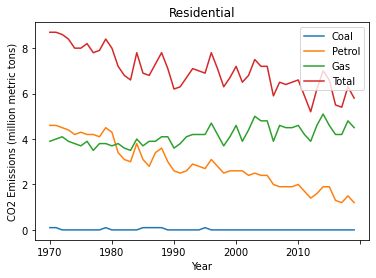

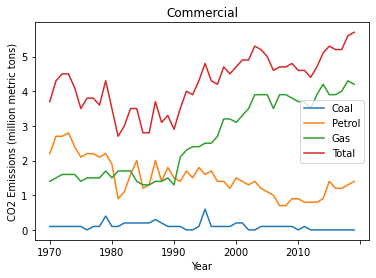

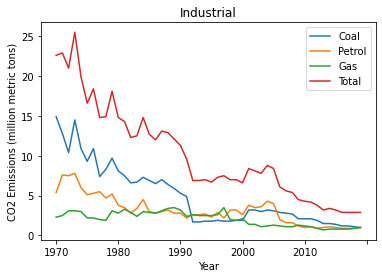

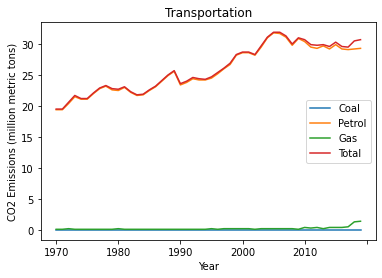

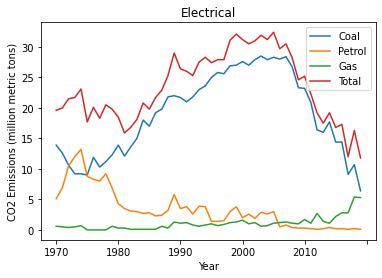

In [21]:
for name in dataframe_array:
    exec(name + ".plot(y=column_names, title=name.capitalize(), xlabel='Year', ylabel='CO2 Emissions (million metric tons)')")
    plt.show()

#### Analysis:
What are your thoughts on what these graphs represent?

\* All trends described below refer to trends shown in the graphs which only represent United States data from 1970 to 2019

Residential CO2 emissions have slightly decreased since 1970, with a notable decrease in petrol use and a slight increase in gas. Coal consumption remained consistently low throughout. The commercial sector has seen a substantial ramp up in total CO2 emissions, the majority of this increase being attributed to increased gas usage. Similarly to residential, petrol use has decreased and coal has remained consistently low, with the exception of a peak in 1995. Industrial emissions have substantially decrease. Dislike the previous two trends, coal constitutes the majority of CO2 emissions, with gas use notably decreasing after 1997. CO2 emissions from transportation have increased substantially. There is a very strong correlation (about 99% R2) between the total emissions and petrol use, demonstrating that petrol is responsible for this increased CO2 output. Lastly, electrical output follows a somewhat quadratic curve, peaking in 2005 and markedly decreasing afterwards. Throughout time, coal emits the most CO2 for electricity production, where petrol use has decreased and gas use has increased fairly recently.    

In the next cell, create a single graph plotting the total emissions of each sector over time. There should be 5 lines, one for each sector.

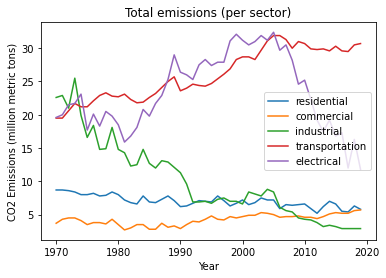

In [29]:
for name in dataframe_array:
    exec("plt.plot(range(1970, 2020), list(" + name + "['Total']), label=name)")
plt.title("Total emissions (per sector)")
plt.ylabel("CO2 Emissions (million metric tons)")
plt.xlabel("Year")
plt.legend()
plt.show()

#### Analysis:
What are your thoughts on what this graph represents?

Total transportation CO2 emissions have increased by about 15 million metric tons since 1970, representing the largest increase. However, industrial emissions have markedly decreased likely due to the production outsourcing to companies with cheaper labor/supplies (such as China). Emissions due to electrical production peaked in 2005-06, then have substantially decreased. Residential emissions have slightly decreased and commerical emissions have slightly increased.

To aid in seeing how each sector and fuel source has contributed to carbon emissions in the past 50 years, use the cell below to calculate and print out the mean yearly emissions of each sector as well as the mean yearly emissions of each fuel source.

In [127]:
print("Mean yearly emissions (by sector)")
mean_sector_table = ds.Table(["Sector", "Year", "Average"])
for sector in dataframe_array:
    # print(sector.capitalize())
    for year in range(50):
        exec("mean_sector = " + "sum(" + sector + ".iloc[" + str(year) + "][0:3]) / 3")
        # exec("print('" + str(year + 1970) + ": ' + str(sum(" + sector + ".iloc[" + str(year) + "][0:3]) / 3))")
        mean_sector_table = mean_sector_table.with_row([sector, year + 1970, mean_sector])
mean_sector_table.show(4)

print()

print("Mean yearly emissions (by fuel source)")
mean_fuel_table = ds.Table(["Fuel source", "Year", "Average"])
for source in ["Coal", "Petrol", "Gas"]:
    # print(source.capitalize())
    for year in range(50):
        cum_sum = 0
        for sector in dataframe_array:
            exec("cum_sum += " + "" + sector + "['" + source + "'][" + str(year) + "]")
        mean_fuel = str(cum_sum / 5)
        # print(str(year + 1970) + ": " + mean_fuel)
        mean_fuel_table = mean_fuel_table.with_row([source, year + 1970, mean_fuel])
mean_fuel_table.show(4)

Mean yearly emissions (by sector)


Sector,Year,Average
residential,1970,2.86667
residential,1971,2.9
residential,1972,2.86667
residential,1973,2.76667



Mean yearly emissions (by fuel source)


Fuel source,Year,Average
Coal,1970,5.8
Coal,1971,5.12
Coal,1972,4.22
Coal,1973,4.76


Finally, create a single line plot of the total emissions of all sectors in Maryland.

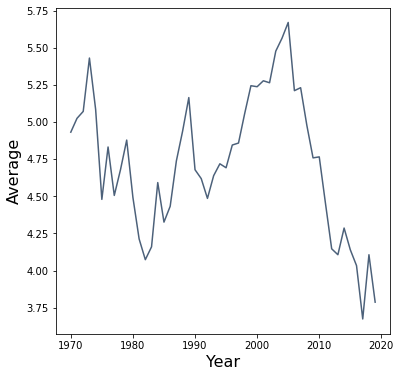

In [136]:
yearly_means = ds.Table(["Year", "Average"])
for year in range(1970, 2020):
    mean_list = mean_sector_table.where("Year", ds.are.equal_to(year)).column("Average")
    yearly_means = yearly_means.with_row([year, sum(mean_list) / len(mean_list)])

yearly_means.plot("Year", "Average")

## 3. Final Analysis

What are some overall takeaways on Maryland's fossil fuel emissions situation you gained from working with and visualizing the data? Is there any sort of action or area Maryland is doing well in? Where they can improve sustainability?

Since 2008, CO2 emissions have decreased, likely thanks to the Maryland nuclear energy initiative. Maryland should continue exploring green energy to reduce coal, gas, and petrol usage. Particularly in the transportation sector should Maryland focus efforts to reduce emissions, as this sector constitutes the largest CO2 emitter.

### References
This data was taken from the Maryland dataset of the 2019 Energy-Related CO2 Emission Data Tables released on April 13, 2022 by the US Energy Information Administration. The original dataset was split into five different csv files, each with one sector.

The dataset can be found at https://www.eia.gov/environment/emissions/state/.